### Raster calculations

**Questions:**<br>
How do I perform calculations on rasters and extract pixel values for defined locations <br>
**Objectives:** 
- Perform operations with two rasters using pyhton built-in math operations
- Reclassify a continuos raster to a categorical raster

**Normalized Difference Vegetation Index**

Suppose we are interested in monitor vegetation utilizing satellite remote sensors/
Scientists have defined the NDVI to quantify the amount of green leaf vegetation using the light reflected in different wavelengths.<br>
NDVI exploit the fact that healthy green leaves strongly absorb red visible light while they mostly reflect light in the near infrared
The NDVI formula is: <br>
```
NDVI= (NIR−red) / (NIR+red)**
```
NDVI values range from -1 to 1. Values close to one indicates high density of green leaves.<br>
Poorly vegetated areas typically have NDVI values close to 0 whereas negative values often indicate cloud and water bodies. <br>
<html>
<img src="PONE-NDVI.jpg" width=700/>
</html>
Source: Wu C-D, McNeely E, Cedeño-Laurent JG, Pan W-C, Adamkiewicz G, Dominici F, et al. (2014) Linking Student Performance in Massachusetts Elementary Schools with the “Greenness” of School Surroundings Using Remote Sensing. PLoS ONE 9(10): e108548. https://doi.org/10.1371/journal.pone.0108548

This part covers how to perform basic math operations using raster datasets

### 1. Load the data

In [1]:
# import pystac and load items from file (search.json)
import pystac
items = pystac.ItemCollection.from_file('search.json')

In [2]:
items

In [3]:
import rioxarray

In [4]:
# define the uris items[1][bandname].ref for red and nir
red_uri = items[1].assets['red'].href
nir_uri = items[1].assets['nir'].href

In [5]:
# load the dataset, use mask=True to set NAN values import rioxarray
red = rioxarray.open_rasterio(red_uri, masked=True)
nir = rioxarray.open_rasterio(nir_uri, masked=True)

In [6]:
# inspect the data set red )show the content
red

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [7]:
# show the crs info of red
red.rio.crs

CRS.from_epsg(32631)

In [8]:
# verify the CRS with pyroj


In [9]:
# restrict the analysis to a certain extent for efficiency - use clip_box
bbox = (629_000, 5_804_000, 639_000, 5_814_000)


In [10]:
red_clip = red.rio.clip_box(*bbox)
nir_clip = nir.rio.clip_box(*bbox)

### 2. Plot raster with robust option
(robust=True) to strecht values between the 2nd and 98 percentile<br>
Hide outliers.

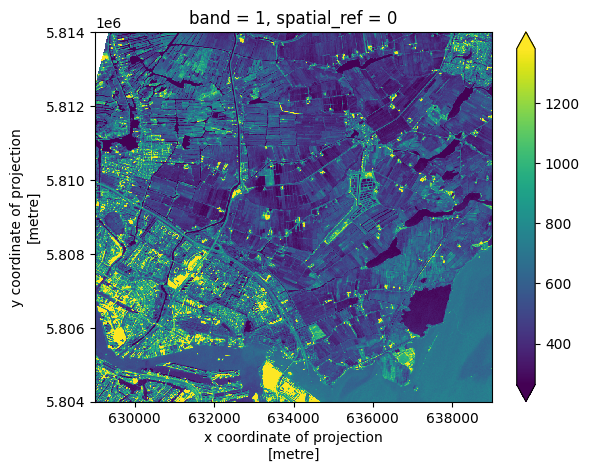

In [11]:
# plot the red raster 
red_clip.plot(robust=True)

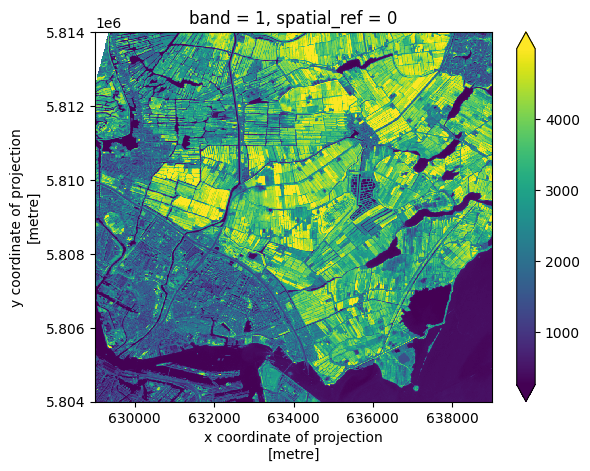

In [12]:
# plot the nir raster
nir_clip.plot(robust=True)

In [13]:
# take a moment to observe the images (end of march)


In [14]:
# inspect the shape of the two rasters
red_clip.shape, nir_clip.shape

((1, 1000, 1000), (1, 1000, 1000))

In [15]:
# verify the crs of the two rasters
red_clip.rio.crs, nir_clip.rio.crs

(CRS.from_epsg(32631), CRS.from_epsg(32631))

### 3. Calculate the NDVI
```
NDVI= (NIR−red) / (NIR+red)
```

In [16]:
# ndvi = (nir_clip - red_clip)/(nir_clip + red_clip)
ndvi = (nir_clip - red_clip)/ (nir_clip + red_clip)

In [17]:
# inspect the crs of the ndvi raster data
ndvi.rio.crs

CRS.from_epsg(32631)

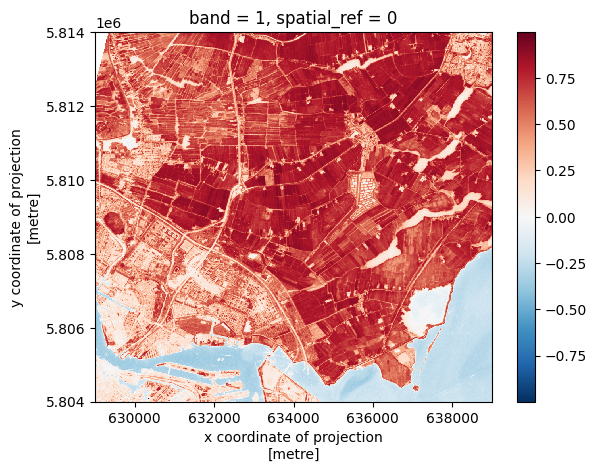

In [18]:
# plot the ndvi
ndvi.plot()

(array([2.00000e+00, 3.00000e+00, 5.22840e+04, 6.34260e+04, 4.27830e+04,
        1.02270e+05, 1.11679e+05, 1.83683e+05, 3.29304e+05, 1.12138e+05]),
 array([-0.77932316, -0.6015507 , -0.42377827, -0.24600583, -0.06823339,
         0.10953906,  0.28731149,  0.46508396,  0.64285642,  0.82062882,
         0.99840128]),
 <BarContainer object of 10 artists>)

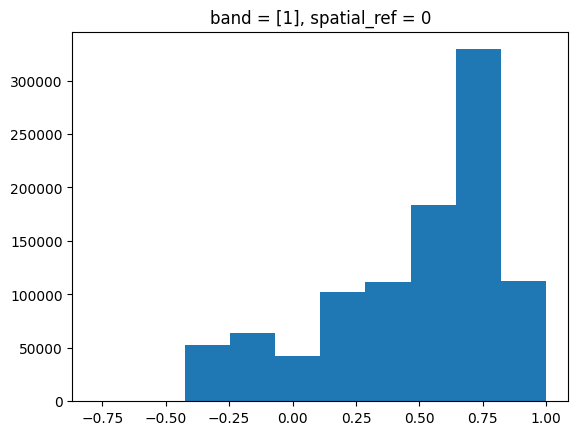

In [19]:
# inspect the histogram 
ndvi.plot.hist()

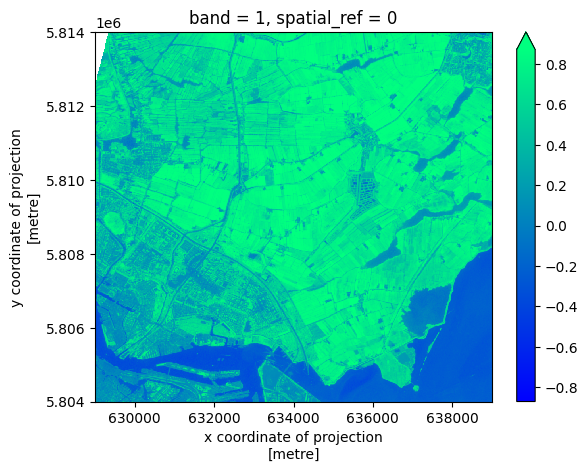

In [20]:
# plot the ndvi using the robust option and colormap winter
ndvi.plot(robust=True, cmap='winter')

### 4. Exercise
Exploratory Data Analysis is useful to understand the data values<br>
We can answer some of the following questions:

1. What is the minimum and maximum value for the ndvi raster? are there missing values?
2. Plot a histogram with 50 bins instead of 8. What can you notice that was not evident before?
3. Plot the ndvi using breaks that make sense for the data

### 4. Answers

In [21]:
ndvi.min().values.item()

-0.779323160648346

In [22]:
ndvi.max().values.item()

0.9984012842178345

In [23]:
# inspect null values
ndvi.isnull().sum()

<xarray.DataArray ()>
array(2428)
Coordinates:
    spatial_ref  int64 0

In [24]:
print(red_clip.isnull().sum().values)

2428


In [25]:
print(ndvi.isnull().sum().values)

2428


In [26]:
# get documentation for xarray's hist
ndvi.plot.hist?

Signature:
ndvi.plot.hist(
    *args: 'Any',
    figsize: 'Iterable[float] | None' = None,
    size: 'float | None' = None,
    aspect: 'AspectOptions' = None,
    ax: 'Axes | None' = None,
    xincrease: 'bool | None' = None,
    yincrease: 'bool | None' = None,
    xscale: 'ScaleOptions' = None,
    yscale: 'ScaleOptions' = None,
    xticks: 'ArrayLike | None' = None,
    yticks: 'ArrayLike | None' = None,
    xlim: 'ArrayLike | None' = None,
    ylim: 'ArrayLike | None' = None,
    **kwargs: 'Any',
) -> 'tuple[np.ndarray, np.ndarray, BarContainer]'
Docstring:
Histogram of DataArray.

Wraps :py:func:`matplotlib:matplotlib.pyplot.hist`.

Plots *N*-dimensional arrays by first flattening the array.

Parameters
----------
darray : DataArray
    Can have any number of dimensions.
figsize : Iterable of float, optional
    A tuple (width, height) of the figure in inches.
    Mutually exclusive with ``size`` and ``ax``.
aspect : "auto", "equal", scalar or None, optional
    Aspect ratio of p

*xarray.plot* does not have the functionality to specify the bins

In [27]:
import matplotlib
matplotlib.pyplot.hist?

Signature:
matplotlib.pyplot.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in each bin, then draws the distribution either as a
`.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
*weights* parameters are forwarded to `numpy.histogram`.

If the data has already been binned and counted, use `~.bar` or
`~.stairs` to plot the distribution::

    counts, bins = np.histogram(x)
    plt.stairs(bins, counts)

Alternatively, plot pre-computed bins and counts using ``hist()`` by
treating each bin as a single point with a weight equal to its count::

    plt.hist(bins[:-1], bins, weights=counts)



(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        7.8000e+01, 3.0280e+03, 1.1662e+04, 1.3240e+04, 2.4276e+04,
        3.7447e+04, 1.5655e+04, 3.7270e+03, 2.6000e+03, 3.9970e+03,
        4.6140e+03, 4.9010e+03, 5.9720e+03, 1.0352e+04, 1.6944e+04,
        1.9332e+04, 2.0327e+04, 2.0824e+04, 2.0933e+04, 2.0854e+04,
        2.1105e+04, 2.1131e+04, 2.1592e+04, 2.2822e+04, 2.5029e+04,
        2.8010e+04, 3.2304e+04, 3.7405e+04, 4.1797e+04, 4.4167e+04,
        4.7066e+04, 5.3588e+04, 6.5406e+04, 7.9327e+04, 8.3917e+04,
        7.3198e+04, 3.4281e+04, 4.6570e+03, 0.0000e+00, 2.0000e+00]),
 array([-0.77932316, -0.74376869, -0.70821416, -0.6726597 , -0.63710523,
        -0.6015507 , -0.56599623, -0.53044176, -0.49488726, -0.45933276,
        -0.42377827, -0.3882238 , -0.3526693 , -0.3171148 , -0.2815603 ,
        -0.24600583, -0.21045133, -0.17489685, -0.13934237, -0.10378787,
        -0.06823339, -0.03

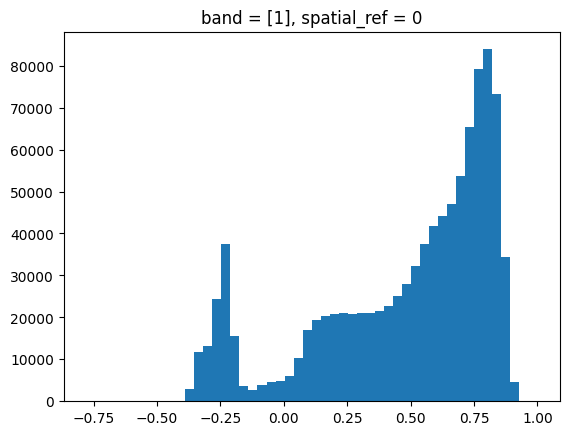

In [28]:
ndvi.plot.hist(bins=50)

**Discretize values**<br>
-1<= ndvi <= 0 --> water <br>
0<= ndvi < 0.2 --> no vegetation <br>
0.2 <=ndvi < 0.7 --> sparse vegetation <br>
0.7 <= ndvi <=1 --> dense vegetation


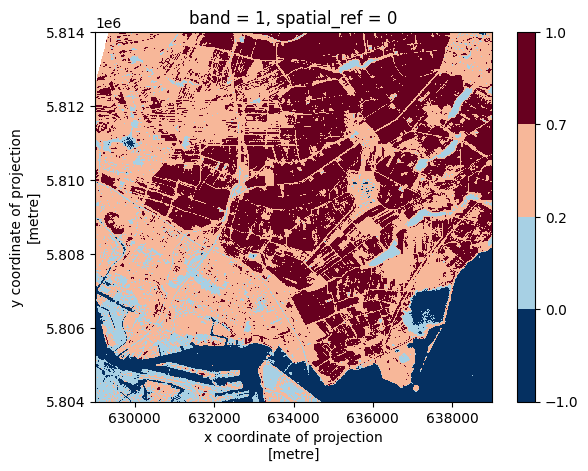

In [29]:
# define class_bins
class_bins = (-1, 0, 0.2, 0.7, 1)
ndvi.plot(levels=class_bins)

In [48]:
print(ndvi.isnull().sum())
print(ndvi.isnull().sum())

<xarray.DataArray ()>
array(2428)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2428)
Coordinates:
    spatial_ref  int64 0


In [40]:
print(ndvi_nonan.isnull().sum())

<xarray.DataArray ()>
array(2428)
Coordinates:
    spatial_ref  int64 0


In [ ]:
# save the file
ndvi.rio.to_raster('ndvi.tif')

### 5. Classifying continuous rasters in python

We can reduce the complexity of the raster <br>
Classification involves assigning each pixel in the raster to a class based on its value.<br>
We can use **numpy.digitize** for this.
We will get classes as in the image below: <br>

<html>
<img src="NDVI-classes.jpg" width=700/>
</html>

Source: Image created for this lesson. [License](https://carpentries-incubator.github.io/geospatial-python/instructor/LICENSE.html)

In [ ]:
# import libraries numoy and xarray, define bins and apply ufunc to classify the raster
import numpy as np
import xarray

In [ ]:
class_bins = (-1, 0, 0.2, 0.7, 1)
ndvi_classified = xarray.apply_ufunc(
    np.digitize,
    ndvi_nonan,
    class_bins
)

In [ ]:
ndvi_classified

In [ ]:
# plot the raster using cmap created from listedColorMap
from matplotlib.colors import ListedColormap
ndvi_colors = ['blue', 'gray', 'green', 'darkgreen']
ndvi_cmap = ListedColormap(ndvi_colors)
ndvi_classified.plot(cmap=ndvi_cmap)

In [ ]:
# save the figure: import matplotlib.pyplot and save the fig
ndvi_classified.rio.to_raster('ndvi_classified.tif')

In [ ]:
# save the raster


In [ ]:
from matplotlib.colors import ListedColormap

# define a cmap
ndvi_colors = ['blue', 'gray', 'green', 'darkgreen']
ndvi_cmap = ListedColormap(ndvi_colors)

# define legend names
import earthpy.plot as ep

# Define class names for the legend
category_names = [
    "Water",
    "No Vegetation",
    "Sparse Vegetation",
    "Dense Vegetation"
]

# define indices
category_indices = list(range(len(category_names)))
im = ndvi_classified.plot(cmap=ndvi_cmap, add_colorbar = False)

plt.title('Classified NDVI')

# draw the legend
ep.draw_legend(im_ax=im, classes = category_indices, titles = category_names)

Reproject and clip one raster to the extent of the smaller raster using reproject_match.<br>
The lines of code below assign a variable to the reprojected raster and calculate the NDVI.

### 8. Recap

1. Load and visualize data
2. Visualization 
3. Calculate NDVI
4. Visualize data sets
